SAS & HSE, Applied Time Series Forecasitng , Winter 2022 

<font color="blue"> HW #2 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму: https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл Surname_w2022_23_hw2.ipynb, например, ivanov_w2022_23_hw2.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadline**: <font color="red"> 10-Jan-2023 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(3,max(0,(10-ДнейПослеДедлайна/7))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже: 

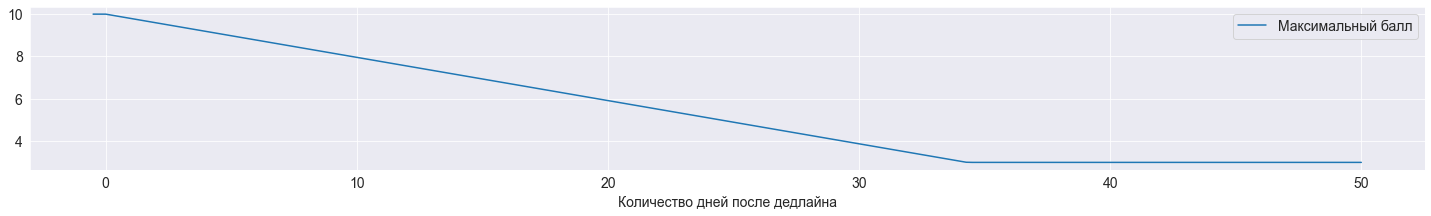

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(0.3, (1-x/49)))] for x in np.linspace(-0.5,50,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 


**Questions 1: Write down an equation for $y_t$ (in a form $y_t=f\left(y_{t-1}, \ldots,y_{t-n}, \varepsilon_t, \ldots, \varepsilon_{t-m}\right)$)  that corresponds to the following ARIMA models**:
 - 1) ARIMA $(p=0,d=k,q=1)$,
    - <Answer>
    <br></br>
 - 2) ARIMA $(p=0,d=k+1,q=1)(P=1, D=1, Q=0)_s$,   
     - <Answer>
    <br></br>


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import timedelta
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools
from copy import deepcopy

# don't forget to upload utils file to the colab session
import warnings, pylab
warnings.filterwarnings('ignore')

# setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(25, 5))
sns.mpl.rc("font", size=14)

<h1 align="center"> Practice</h1>

<h2 align="center">  1. Download data for following data sets (15%)</h2>


* 0) Download data
  <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> 
  
  description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "TS" in column O

* 1) plot target ts 
* 2) plot cros-series plot: independent variables and target variable on the same subplot 
* 3) answer the questions: 
    - is there seasonality? If there is seasonality then define period(s) of seasonality.
    - trend?
    - not-stable dispersion? 
* 4) define the proper list of transformations in order to make thet ts stationary (find optimal lambda in Box-Cox tranformation, if needed). 

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])

ts = df[df.id == 3].drop(columns='id').set_index('Date')['2012-01-01':'2015-01-01']

In [34]:
ts.describe()

,EnergyConsumption,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,Temp7,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
count,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,1097.000000,1097.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,220038.821707,-1.109936,NaN,NaN,NaN,NaN,NaN,NaN,0.139471,0.183227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,17095.040907,14.917201,NaN,NaN,NaN,NaN,NaN,NaN,0.346596,0.387029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,183861.704000,-43.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,206687.417000,-11.800000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,220225.354000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,232588.956000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,255155.794000,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As one can see there are no meaningful values for regressors Temp2, ..., Temp7, Temp1_South_Less, ..., Temp4_South_Less, Temp1_South_Gr, ..., Temp4_South_Gr, so we can drop them.

In [35]:
ts = ts.drop(columns=[f'Temp{i+1}' for i in range(1, 7)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Less' for i in range(4)], errors='ignore')
ts = ts.drop(columns=[f'Temp{i+1}_South_Gr' for i in range(4)], errors='ignore')

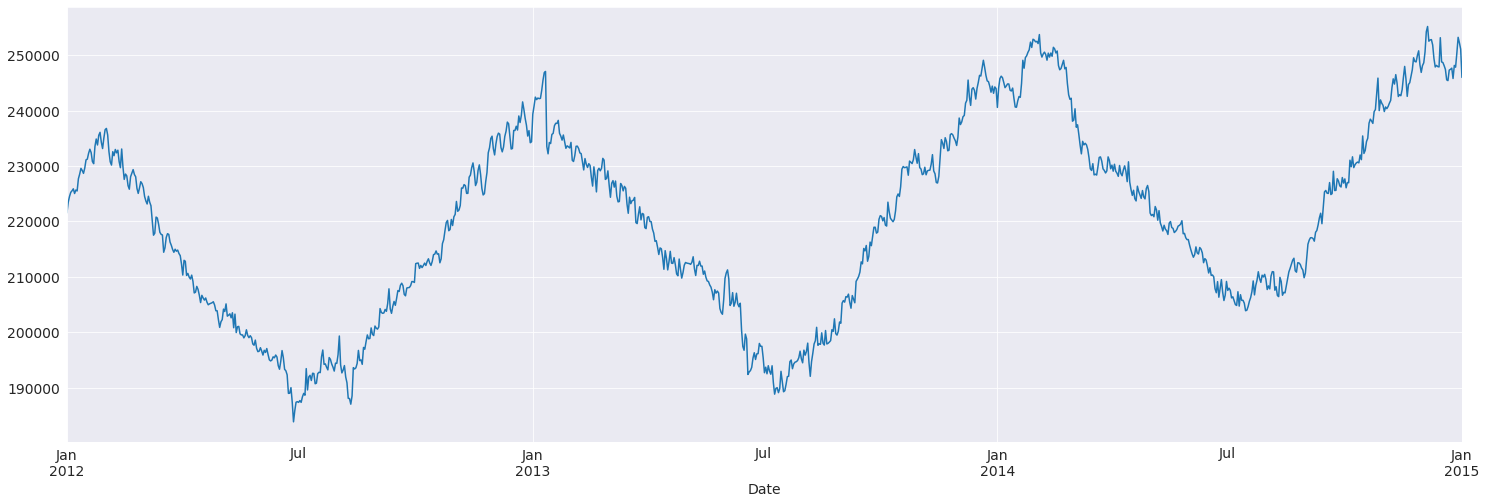

In [36]:
# Plot the TS

ts['EnergyConsumption'].plot(figsize=(25,8));

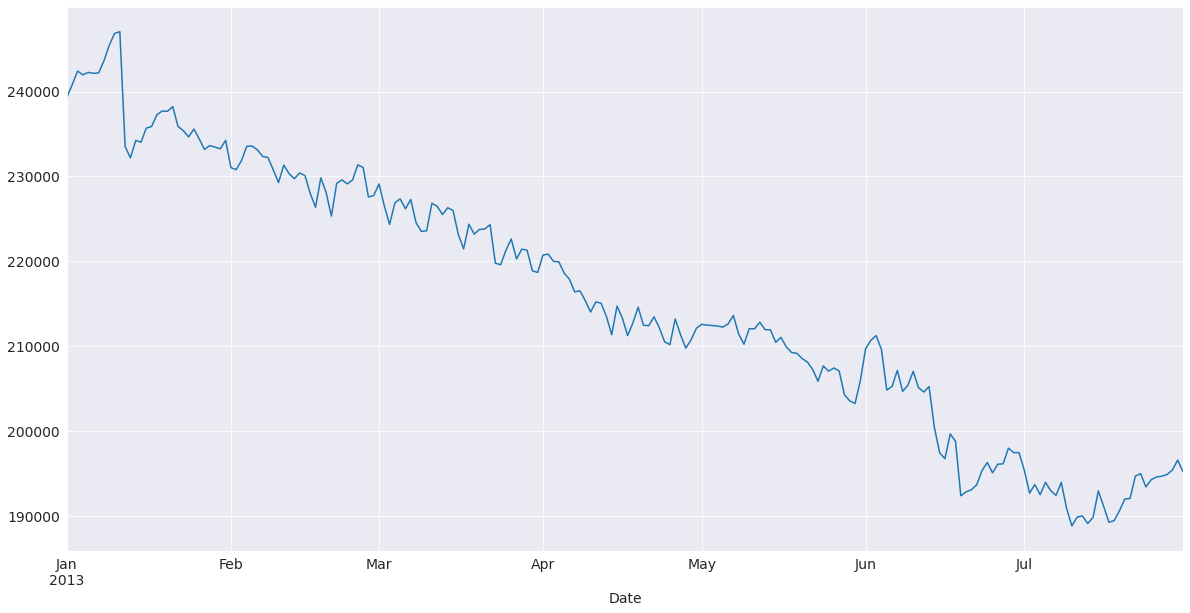

In [37]:
# Plot 6 months in order to try see week seasonality
ts['EnergyConsumption']['2013-01':'2013-07'].plot(figsize=(20,10));

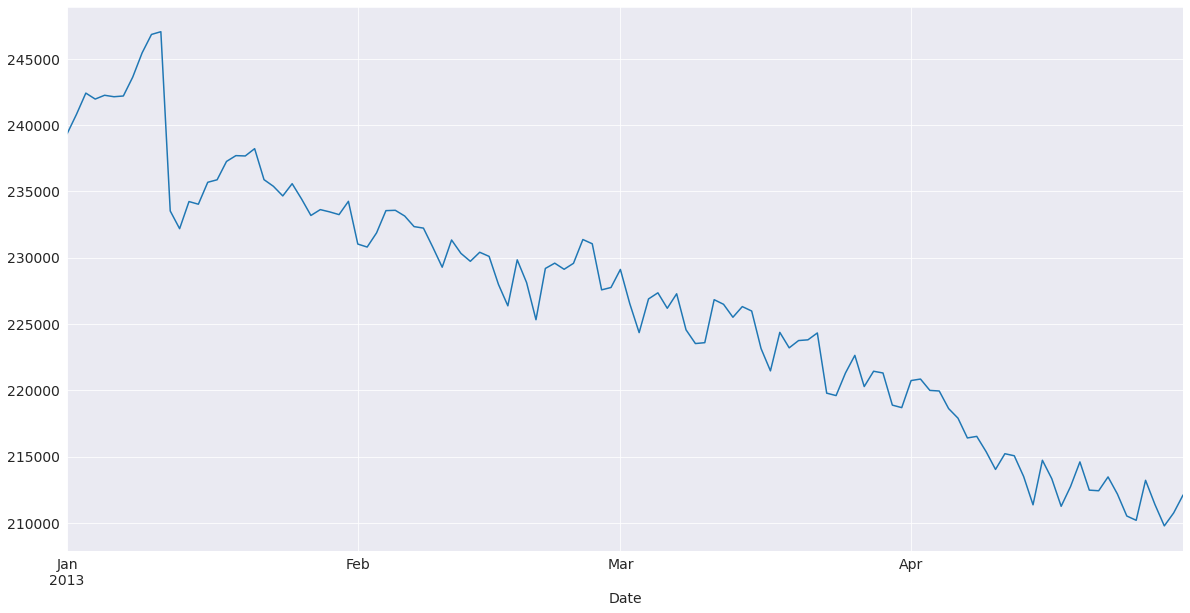

In [38]:
# Plot 3 months in order to try see week seasonality
ts['EnergyConsumption']['2013-01':'2013-04'].plot(figsize=(20,10));

По идее должна быть недельная сезонность, потому что мы оцениваем потребление энергии. Но на данном временном ряде где то наблюдается недельная сезонность, а где то ее нет. Поскольку для решение задачи важно сделать ряд стационарным, попробуем сначала использовать только годовое сезонное дифференцирование, если ряд останется нестационарным, то тогда применим дифференцирование по неделям. Излишнее диффренцирование может только усложнить модель.

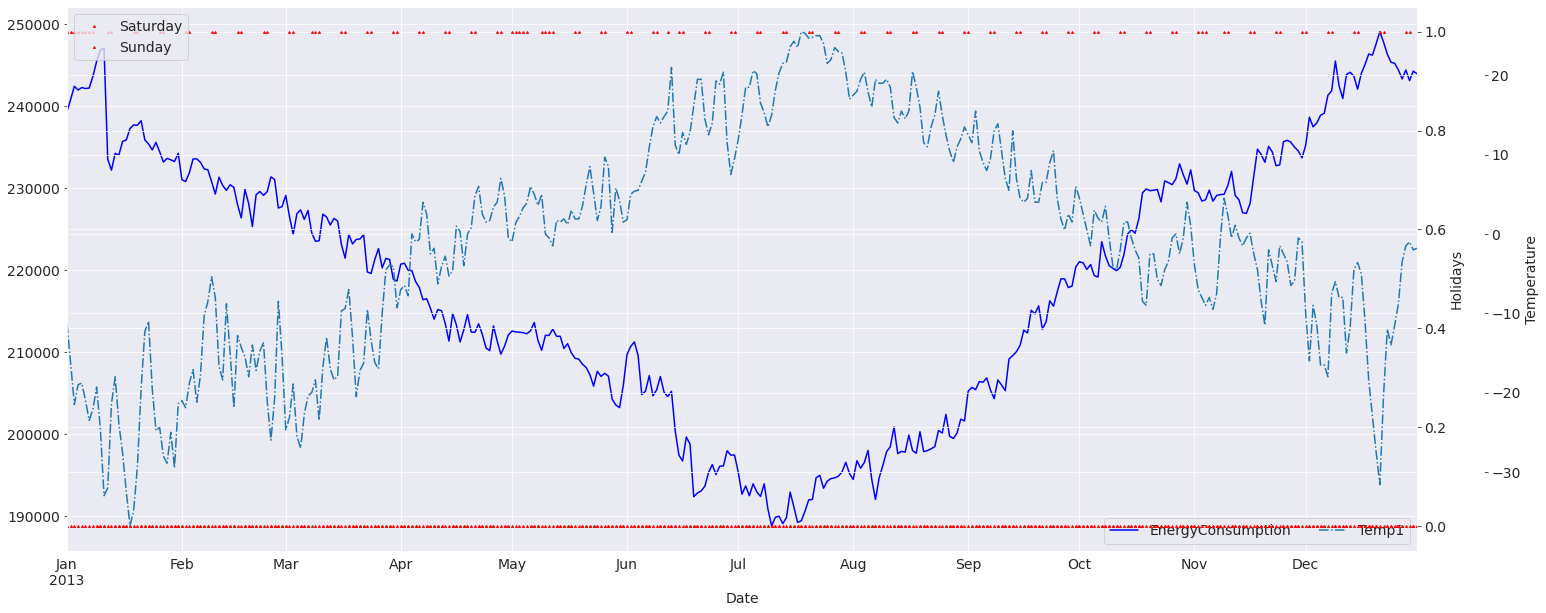

In [39]:
# Plot the TS together with independent variables

fig, ax = plt.subplots(figsize=[30,10])
ax2, ax3 = ax.twinx(), ax.twinx()
ax2.set_ylabel('Holidays')
ax3.set_ylabel('Temperature')
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.05))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.75)

ts_to_plot = ts.loc['2013-01':'2013-12']
ts_to_plot['EnergyConsumption'].plot(ax = ax,  style='b-')
ts_to_plot[['Saturday', 'Sunday']].plot(ax = ax2, style='r', marker = '^', markersize = 2.0, linewidth=0.0)

for col in ts.columns:
    if col.startswith('Temp'):
        style = '--' if col.endswith('Less') else '-.'
        ts_to_plot[col].plot(ax = ax3,  style=style)

lines = ax.get_lines() + ax3.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='lower right', ncol=3)
ax2.legend(loc='upper left')
plt.show()

One can see from the plots that TS be described as follows:

* there is increasing trend,
* there are yearly of seasonality (period 365) and may be weekly of seasonality (period 7),
* it seems there is no variance instability.

Thus, in order to make the TS stationary

* we need trend differentiation with shift 1,
* we need one seasonal differentiations with shifts 365, if TS will be non-stationary we use also seasonal differentiations with shifts 7,
* we don't need Box-Cox transformation.

<h2 align="center">2. Fit ARIMA Model (50%) </h2>

**I. Build ARIMA forecast manually ** 

You should follow the next scheme:

 * 0) split the ts to two parts: first 80% of timestamps (ts1) and the last 20% of timestamps (ts2)   
 * 1) apply transformation to make the ts1 stationary;
 * 2) define exogenous variables and apply the transformations to them, if needed
 * 3) train simple ARIMA (0, 0, 0) with exogenous variables only, endog = 1) exog = 2);
 * 4) plot ACF/PACF for resifuals of the simple ARIMA(0, 0, 0) in order to understand which $p, P, q, Q$ can be used; define set of candidate parameters for ARMA (for the train TS);
 * 5) select the best parameters of the ARIMA models iteratively: 
    * While there are significant ACF/PACF lags and ARIMA can be trained
      - change only one of 6 ARIMA parameters (p, d, q, P, D, Q) 
      - compare the new model with the previous best model based on  AIC|BIC|HQIC
      - plot ACF/PACF of the best model

  **Note**: there is no goal to minimize AIC|BIC|HQIC, the goal is to exclude all significant autocorrelations from ACF/PACF.

* 6) Check  the best model residuals for 
    - unbiasedness, 
    - stationarity
    - non-autocorrelation
    - white noise hypothesis

    If all tests fail you need to review your choice.
* 7) Run analysis of the regression coafficients
    
    - if there are some insignificant regressors that can be eliminated, please exclude them from the model.

* 8) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 9) Calculate loss MAPE of your forecast. Does the forecast look appropriate?

In [40]:
# Split TS 80%-20%
split_idx = int(len(ts) * 0.8)
ts1 = ts.iloc[:split_idx]
ts2 = ts.iloc[split_idx:]

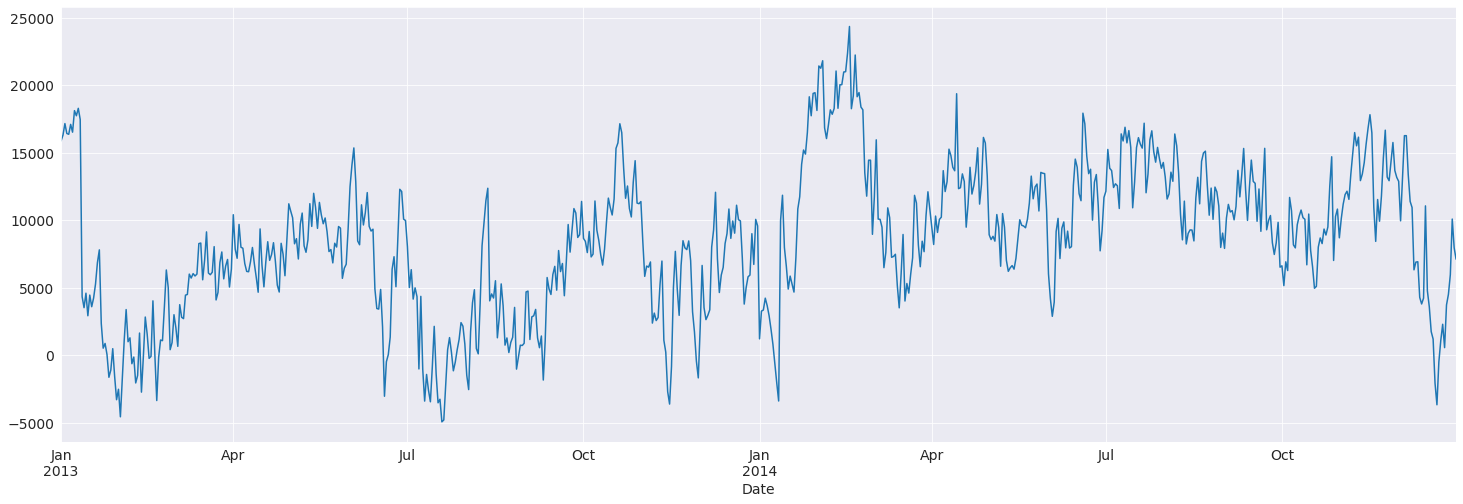

In [41]:
# seasonal differencing 1
s = 365
ts_sdiff = (ts - ts.shift(s)).iloc[s:]
ts_sdiff['EnergyConsumption']['2013':'2014'].plot(figsize=(25,8))
plt.show()

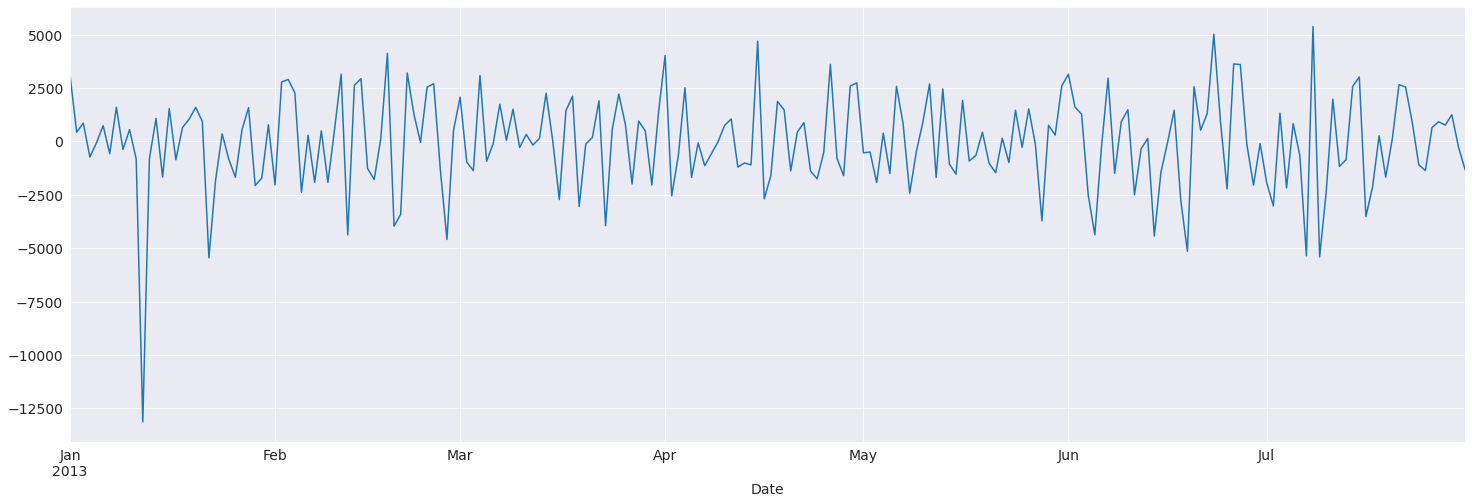

In [42]:
# trend differencing
ts_sdiff_tdiff = (ts_sdiff - ts_sdiff.shift(1)).iloc[1:]
ts_sdiff_tdiff['EnergyConsumption']['2013-01':'2013-07'].plot(figsize=(25,8))
plt.show()

In [43]:
# Augmented Dickey-Fuller unit root test: 
# H0: ts is not stationary (https://www.statisticshowto.com/adf-augmented-dickey-fuller-test/)
df_stat = stattools.adfuller(ts_sdiff_tdiff['EnergyConsumption'])
print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ncritical values: %s' % 
      (df_stat[0], df_stat[1], df_stat[2], df_stat[4]))

The Augmented Dickey-Fuller test statistic -6.255923, 
pvalue: 0.00 
maximal Lag: 20 
critical values: {'1%': -3.439593802573824, '5%': -2.865619356068967, '10%': -2.568942332870462}


In [44]:
# Kwiatkowski–Phillips–Schmidt–Shin
# H0: ts is stationary (https://www.statisticshowto.com/kpss-test/)
kpss_stat= stattools.kpss(ts_sdiff_tdiff['EnergyConsumption'])
print('The KPSS test statistic %f, \npvalue: %.2f \nmaximal Lag: %i \ntable distribution: %s' % 
      (kpss_stat[0], kpss_stat[1], kpss_stat[2], kpss_stat[3]))

The KPSS test statistic 0.032557, 
pvalue: 0.10 
maximal Lag: 20 
table distribution: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


According to both Dickey-Fuller and KPSS tests the trasformed TS is stationary.

In [45]:
def plot_acf_pacf(model, lags=365):
    fig = plt.figure(figsize=[25,10])
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(model.resid.values.squeeze(), lags=lags, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(model.resid.values.squeeze(), lags=lags, ax=ax2)

                              ARMA Model Results                              
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:                     ARMA(0, 0)   Log Likelihood               -4621.921
Method:                           css   S.D. of innovations           2050.658
Date:                Thu, 12 Jan 2023   AIC                           9253.841
Time:                        21:06:46   BIC                           9275.023
Sample:                    01-01-2013   HQIC                          9262.145
                         - 05-26-2014                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3981     90.716     -0.037      0.970    -181.199     174.402
Temp1        -35.3911     15.574     -2.272      0.023     -65.915      -4.867
Saturday   -1349.8894    135.365     -9.972      0.0

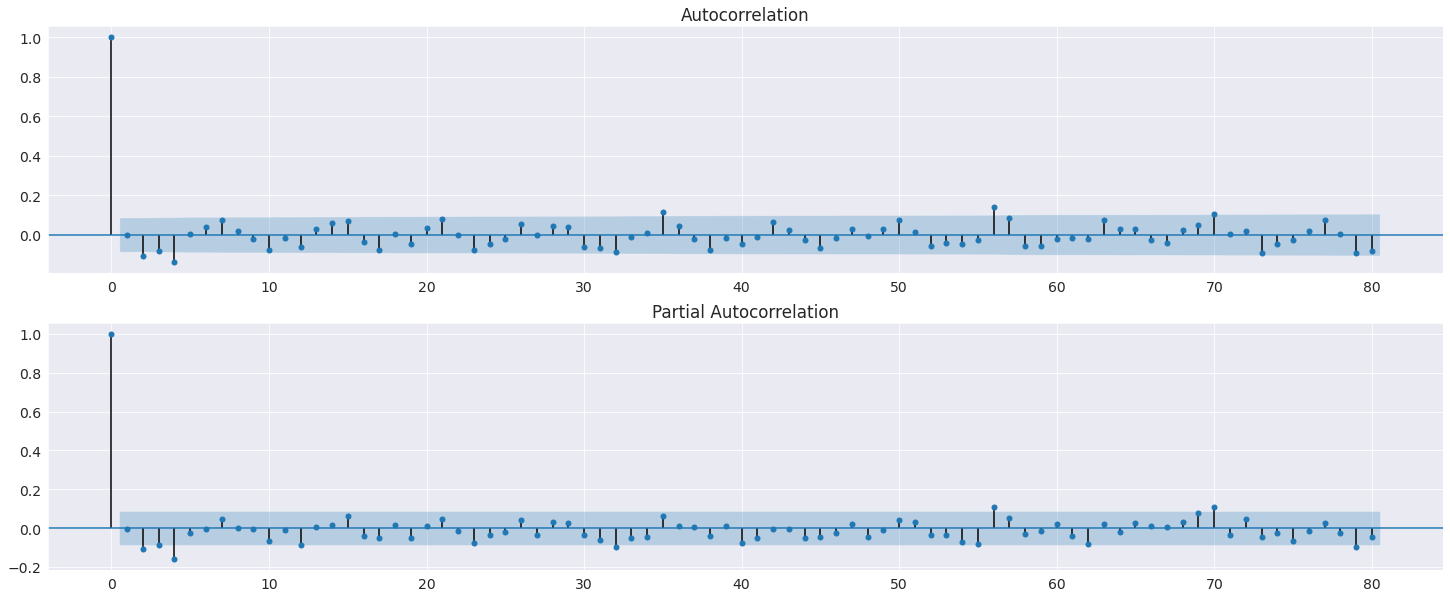

In [46]:
# Step 0: train ARIMA(0,0,0)
ts_sdiff_tdiff_1 = ts_sdiff_tdiff[:-len(ts2)]
endog = ts_sdiff_tdiff_1['EnergyConsumption']
exogs = ts_sdiff_tdiff_1.drop(columns=['EnergyConsumption'])
arima_order_000 = sm.tsa.ARIMA(endog=endog, order=[0,0,0], exog=exogs).fit()
print(arima_order_000.summary())
plot_acf_pacf(arima_order_000, lags=80)

Analysis of ACF and PACF for ARIMA(0,0,0) suggests the following parameter candidate values:

* q = {2,3,4}
* p = {2,3,4}

P и Q this model does not have

Let's move step-by-step and start with changing only one parameter.

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2], 0, 0)   Log Likelihood               -4618.898
Date:                Thu, 12 Jan 2023   AIC                           9247.796
Time:                        21:43:29   BIC                           9268.977
Sample:                    01-01-2013   HQIC                          9256.100
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3914     13.919     -2.543      0.011     -62.673      -8.110
Saturday   -1349.8797    133.112    -10.141      0.000   -1610.775   -1088.985
Sunday     -1694.3001    142.161    -11.918      0.0

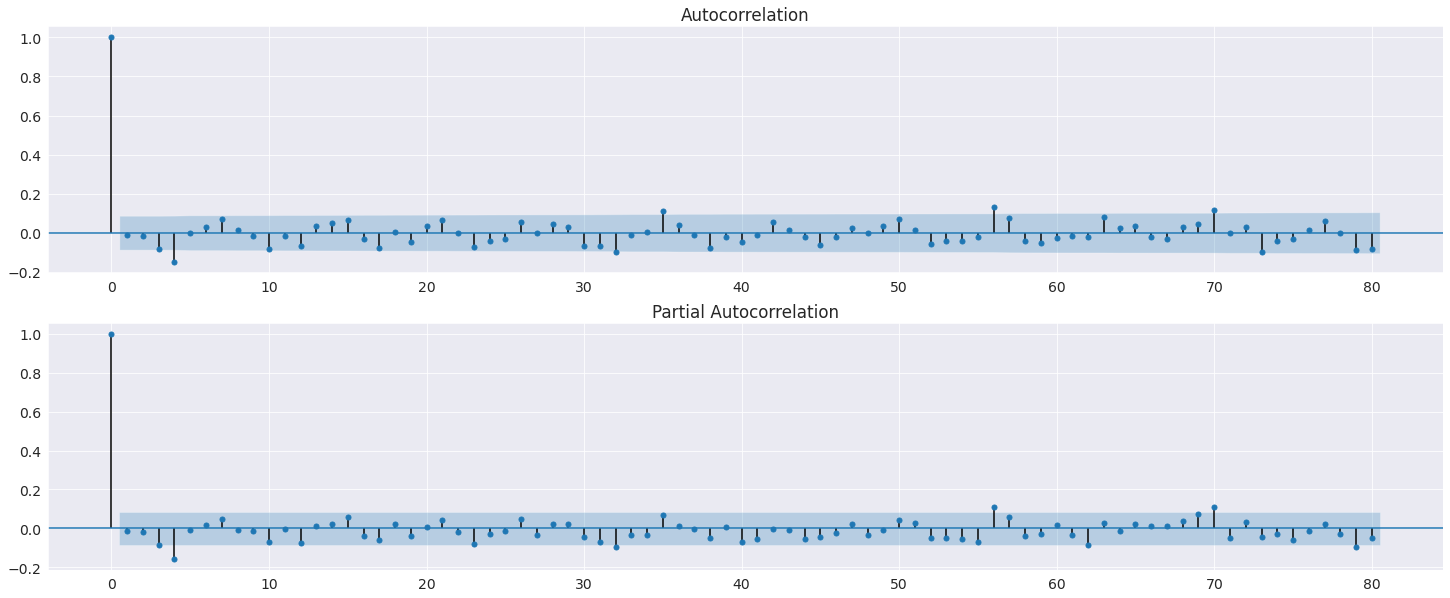

In [93]:
# Step 1: train ARIMA([2],0,0)
arima_order_2_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2,),0,0], exog=exogs).fit()
print(arima_order_2_0_0.summary())
plot_acf_pacf(arima_order_2_0_0, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([3], 0, 0)   Log Likelihood               -4620.119
Date:                Thu, 12 Jan 2023   AIC                           9250.237
Time:                        21:43:22   BIC                           9271.419
Sample:                    01-01-2013   HQIC                          9258.541
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.720     -2.580      0.010     -62.282      -8.501
Saturday   -1349.8797    129.585    -10.417      0.000   -1603.862   -1095.898
Sunday     -1694.3001    137.515    -12.321      0.0

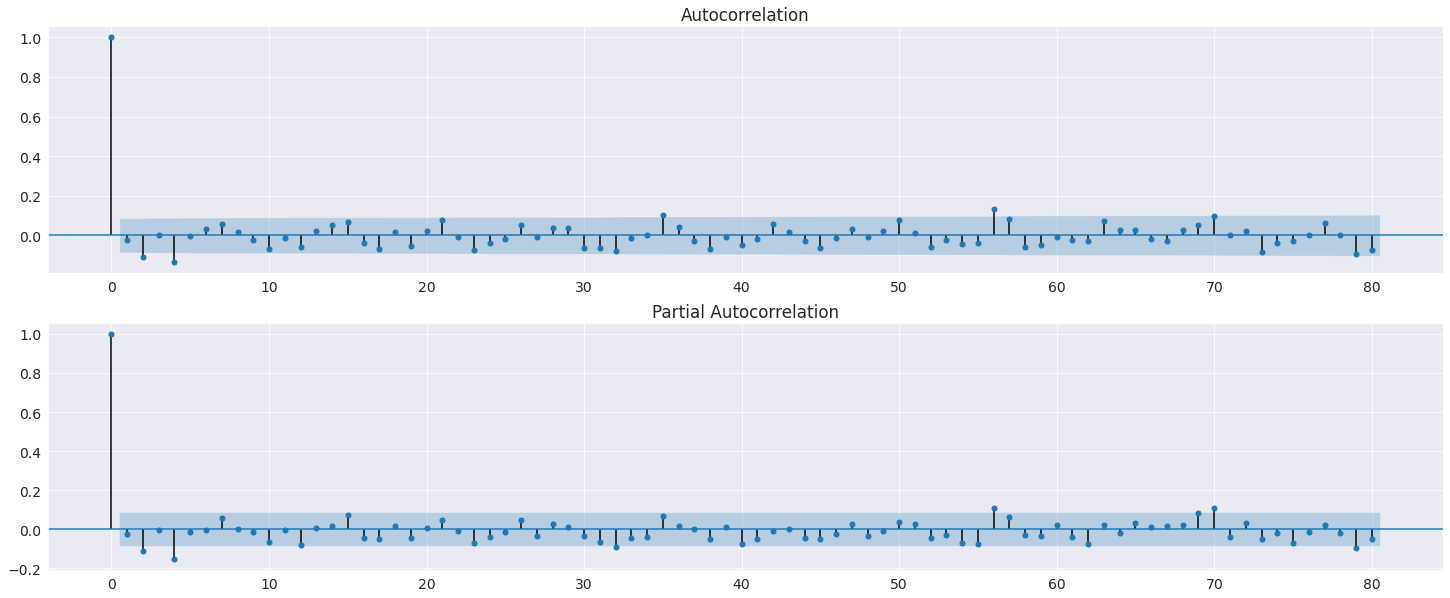

In [92]:
# Step 1: train ARIMA([3],0,0)
arima_order_3_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(3,),0,0], exog=exogs).fit()
print(arima_order_3_0_0.summary())
plot_acf_pacf(arima_order_3_0_0, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([4], 0, 0)   Log Likelihood               -4616.885
Date:                Thu, 12 Jan 2023   AIC                           9243.771
Time:                        21:43:15   BIC                           9264.952
Sample:                    01-01-2013   HQIC                          9252.075
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.680     -2.587      0.010     -62.204      -8.579
Saturday   -1349.8797    126.393    -10.680      0.000   -1597.605   -1102.154
Sunday     -1694.3001    132.387    -12.798      0.0

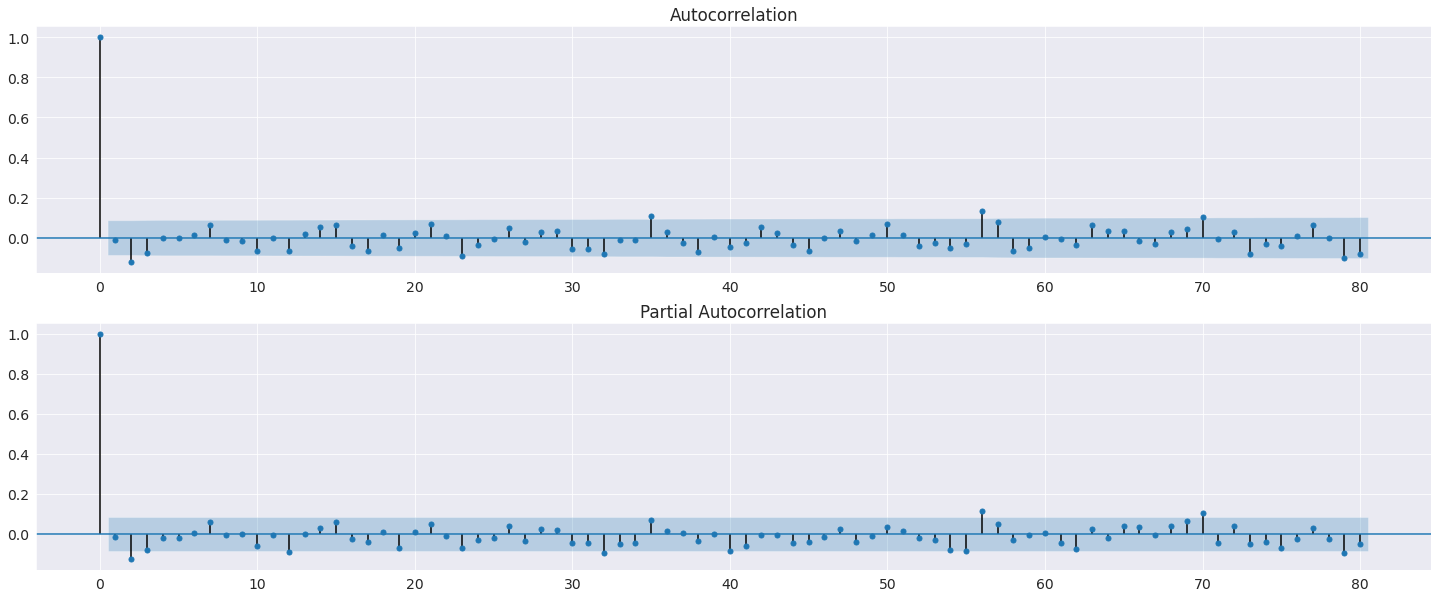

In [91]:
# Step 1: train ARIMA([4],0,0)
arima_order_4_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(4,),0,0], exog=exogs).fit()
print(arima_order_4_0_0.summary())
plot_acf_pacf(arima_order_4_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 3], 0, 0)   Log Likelihood               -4617.059
Date:                   Thu, 12 Jan 2023   AIC                           9246.117
Time:                           21:43:04   BIC                           9271.535
Sample:                       01-01-2013   HQIC                          9256.082
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.917     -2.543      0.011     -62.669      -8.114
Saturday   -1349.8797    131.519    -10.264      0.000   -1607.652   -1092.108
Sunday     -1694.3001    141

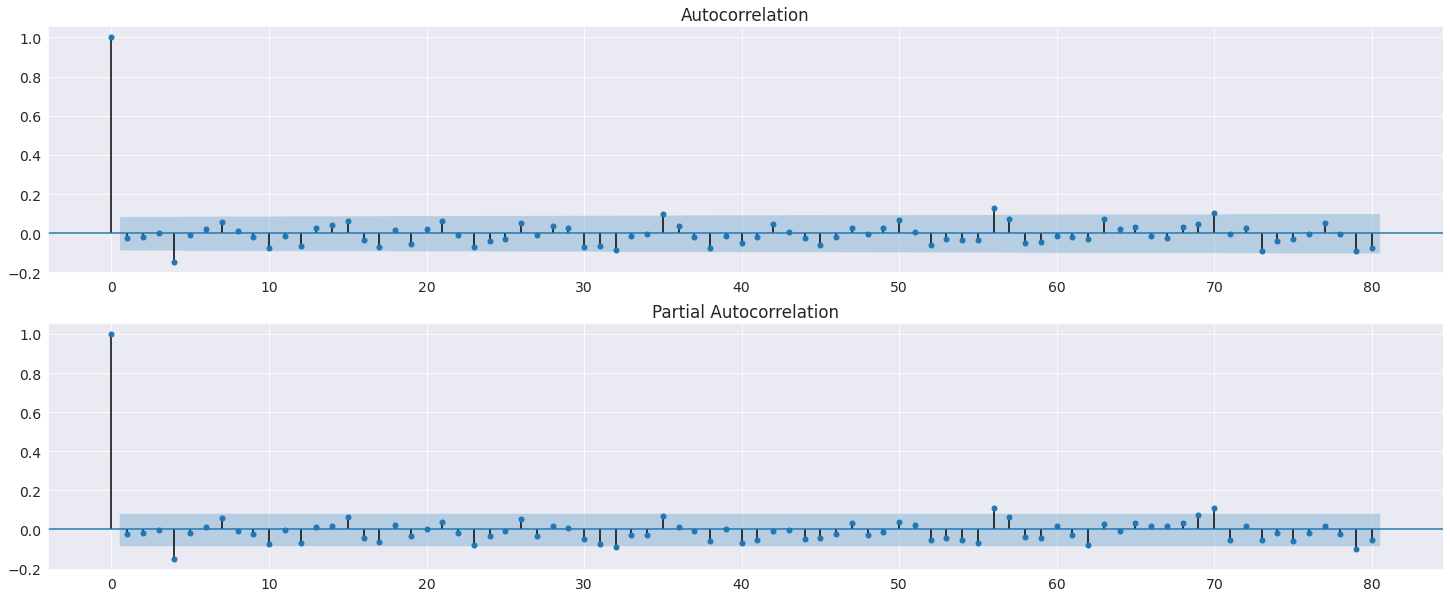

In [90]:
# Step 1: train ARIMA([2, 3],0,0)
arima_order_23_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 3,),0,0], exog=exogs).fit()
print(arima_order_23_0_0.summary())
plot_acf_pacf(arima_order_23_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 4], 0, 0)   Log Likelihood               -4612.804
Date:                   Thu, 12 Jan 2023   AIC                           9237.609
Time:                           21:42:40   BIC                           9263.027
Sample:                       01-01-2013   HQIC                          9247.573
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.892     -2.548      0.011     -62.619      -8.164
Saturday   -1349.8797    127.954    -10.550      0.000   -1600.665   -1099.094
Sunday     -1694.3001    135

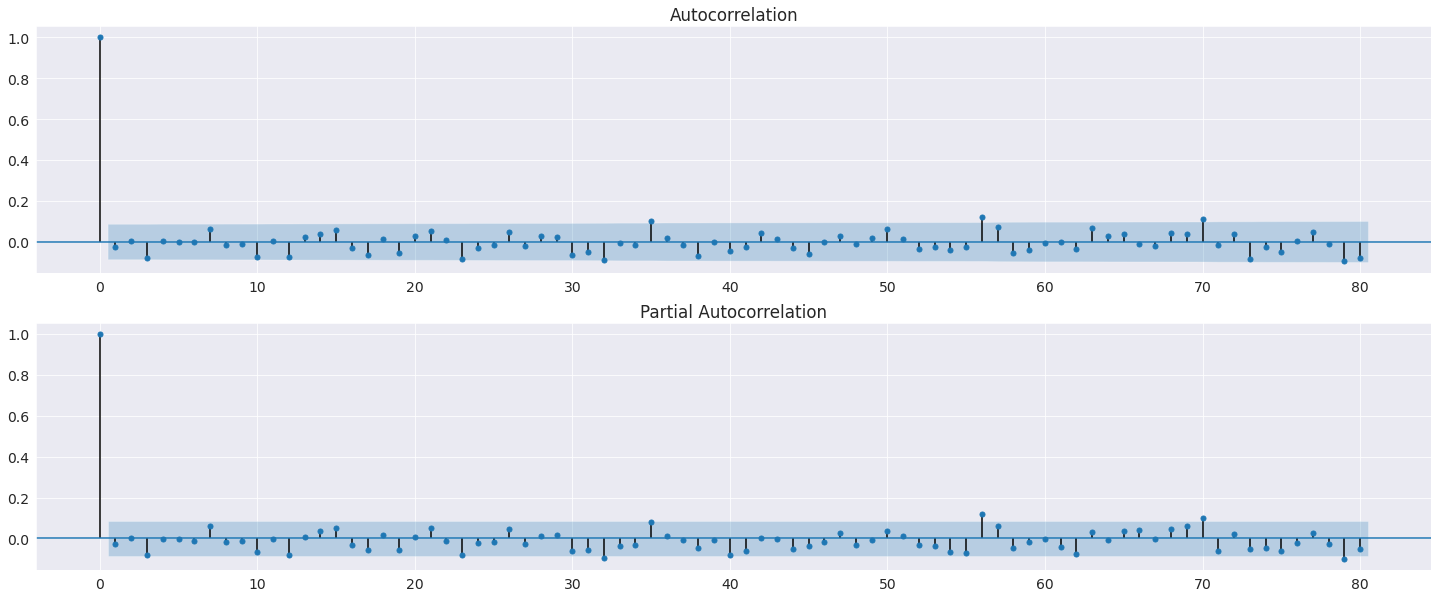

In [89]:
# Step 1: train ARIMA([2, 4],0,0)
arima_order_24_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 4,),0,0], exog=exogs).fit()
print(arima_order_24_0_0.summary())
plot_acf_pacf(arima_order_24_0_0, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([3, 4], 0, 0)   Log Likelihood               -4615.031
Date:                   Thu, 12 Jan 2023   AIC                           9242.062
Time:                           21:42:19   BIC                           9267.480
Sample:                       01-01-2013   HQIC                          9252.027
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3916     13.631     -2.596      0.009     -62.108      -8.675
Saturday   -1349.8797    125.234    -10.779      0.000   -1595.334   -1104.426
Sunday     -1694.3001    131

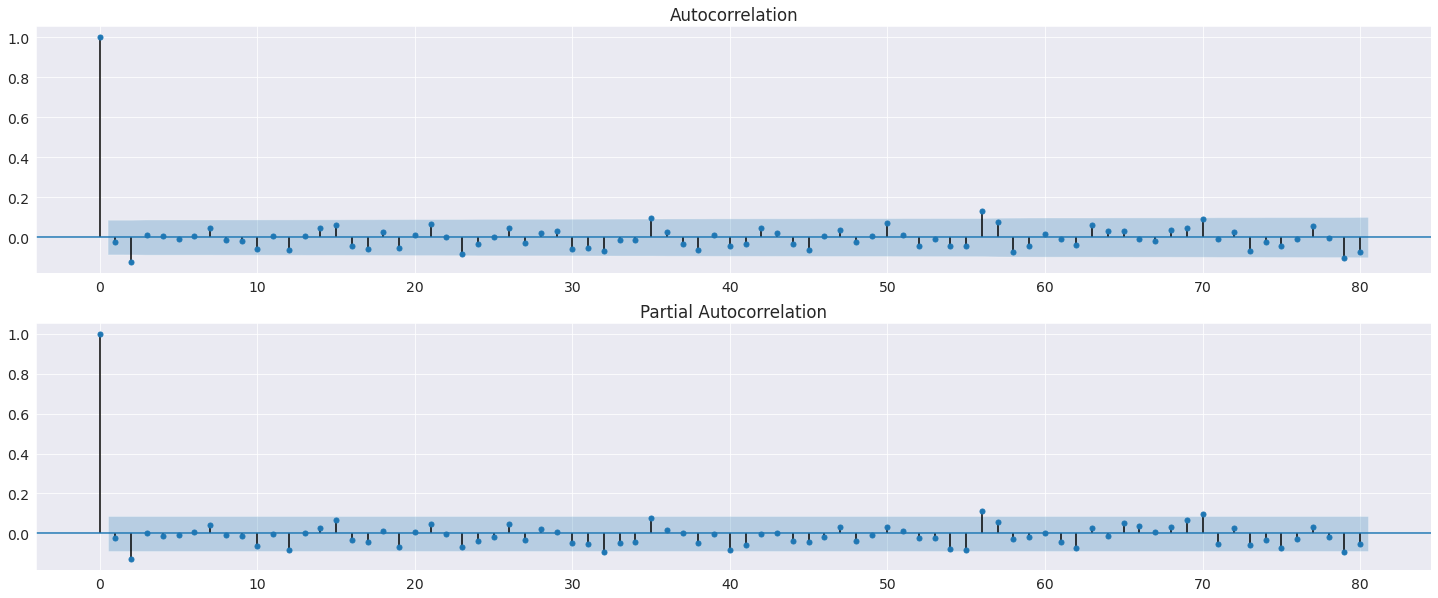

In [88]:
# Step 1: train ARIMA([3, 4],0,0)
arima_order_34_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(3, 4,),0,0], exog=exogs).fit()
print(arima_order_34_0_0.summary())
plot_acf_pacf(arima_order_34_0_0, lags=80)

                                  SARIMAX Results                                   
Dep. Variable:            EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([2, 3, 4], 0, 0)   Log Likelihood               -4610.902
Date:                      Thu, 12 Jan 2023   AIC                           9235.804
Time:                              21:42:11   BIC                           9265.458
Sample:                          01-01-2013   HQIC                          9247.429
                               - 05-26-2014                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.832     -2.559      0.011     -62.502      -8.281
Saturday   -1349.8797    126.913    -10.636      0.000   -1598.624   -1101.135
Sund

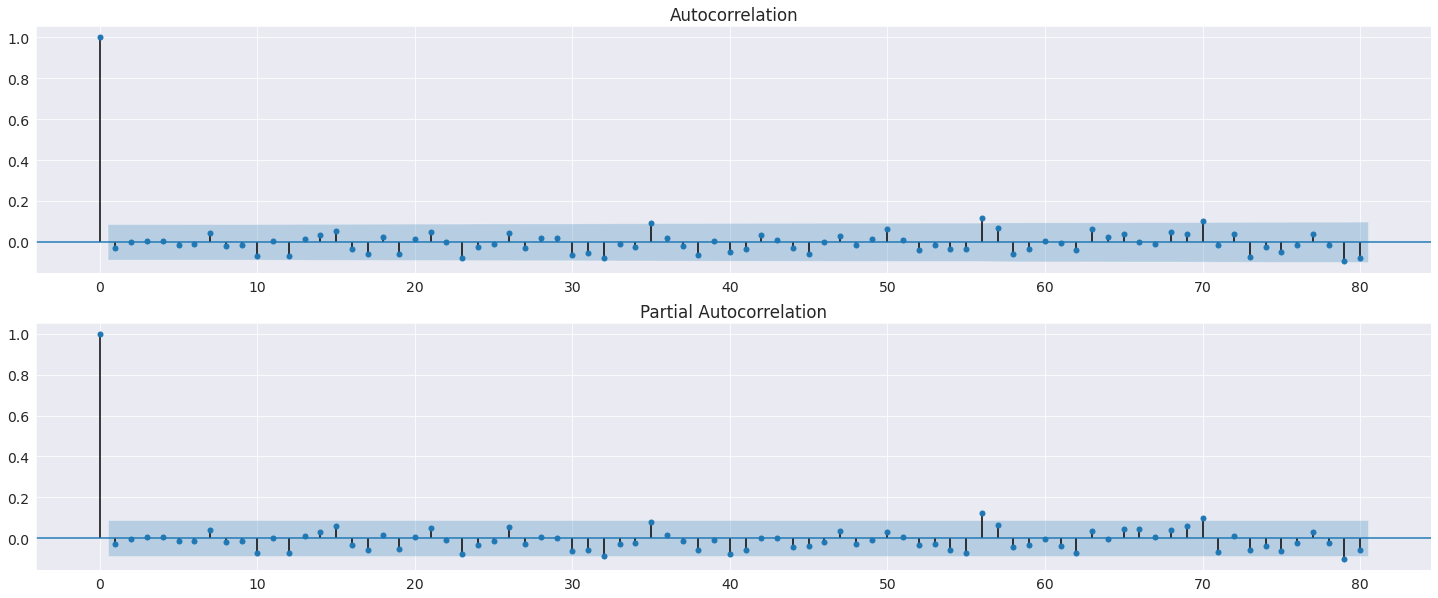

In [87]:
# Step 1: train ARIMA([2, 3, 4],0,0)
arima_order_234_0_0 = sm.tsa.SARIMAX(endog=endog, order=[(2, 3, 4,),0,0], exog=exogs).fit()
print(arima_order_234_0_0.summary())
plot_acf_pacf(arima_order_234_0_0, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [2])   Log Likelihood               -4617.689
Date:                Thu, 12 Jan 2023   AIC                           9245.378
Time:                        21:44:41   BIC                           9266.560
Sample:                    01-01-2013   HQIC                          9253.682
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3908     14.114     -2.508      0.012     -63.053      -7.729
Saturday   -1349.8793    134.150    -10.062      0.000   -1612.808   -1086.950
Sunday     -1694.3002    143.462    -11.810      0.0

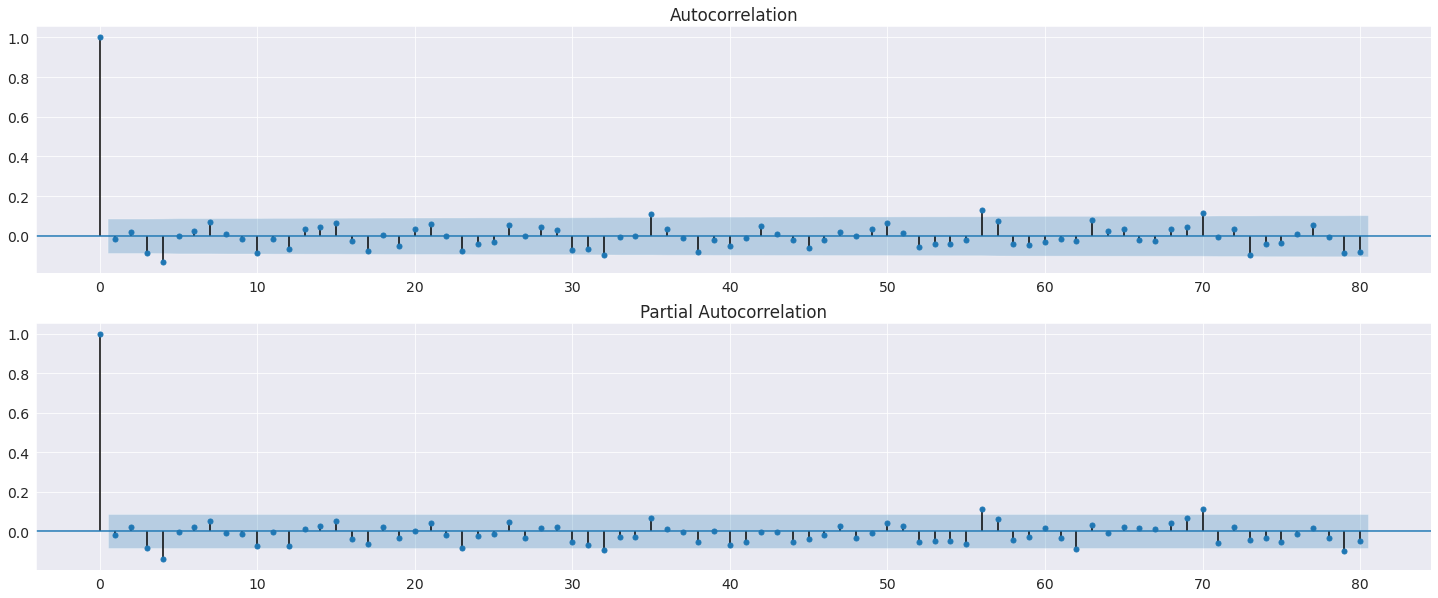

In [95]:
# Step 2: train ARIMA(0,0,[2])
arima_order_0_0_2 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(2,)], exog=exogs).fit()
print(arima_order_0_0_2.summary())
plot_acf_pacf(arima_order_0_0_2, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [3])   Log Likelihood               -4620.255
Date:                Thu, 12 Jan 2023   AIC                           9250.509
Time:                        21:47:08   BIC                           9271.691
Sample:                    01-01-2013   HQIC                          9258.813
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.896     -2.547      0.011     -62.627      -8.156
Saturday   -1349.8797    132.039    -10.223      0.000   -1608.672   -1091.088
Sunday     -1694.3001    139.703    -12.128      0.0

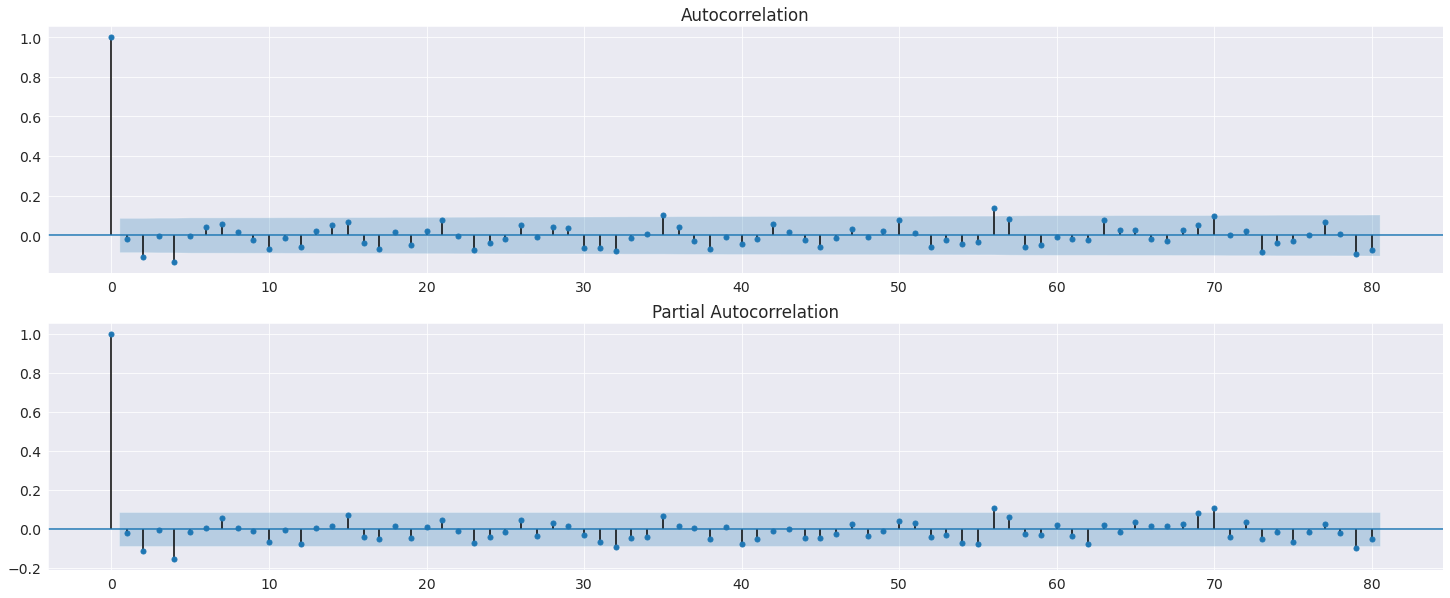

In [97]:
# Step 2: train ARIMA(0,0,[3])
arima_order_0_0_3 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(3,)], exog=exogs).fit()
print(arima_order_0_0_3.summary())
plot_acf_pacf(arima_order_0_0_3, lags=80)

                               SARIMAX Results                                
Dep. Variable:      EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [4])   Log Likelihood               -4617.137
Date:                Thu, 12 Jan 2023   AIC                           9244.273
Time:                        21:47:30   BIC                           9265.455
Sample:                    01-01-2013   HQIC                          9252.577
                         - 05-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3916     12.959     -2.731      0.006     -60.791      -9.992
Saturday   -1349.8797    121.280    -11.130      0.000   -1587.584   -1112.176
Sunday     -1694.3001    127.496    -13.289      0.0

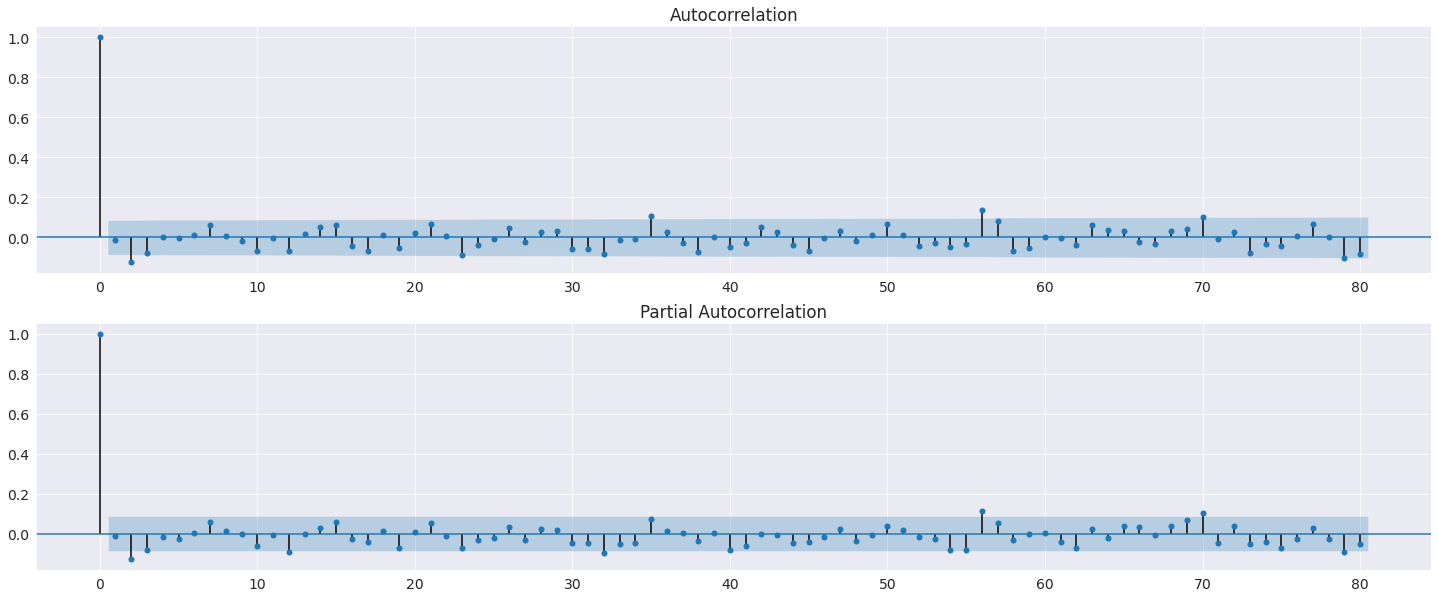

In [99]:
# Step 2: train ARIMA(0,0,[4])
arima_order_0_0_4 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(4,)], exog=exogs).fit()
print(arima_order_0_0_4.summary())
plot_acf_pacf(arima_order_0_0_4, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [2, 3])   Log Likelihood               -4615.957
Date:                   Thu, 12 Jan 2023   AIC                           9243.913
Time:                           21:47:42   BIC                           9269.331
Sample:                       01-01-2013   HQIC                          9253.878
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3914     14.202     -2.492      0.013     -63.227      -7.556
Saturday   -1349.8796    135.383     -9.971      0.000   -1615.226   -1084.534
Sunday     -1694.3001    145

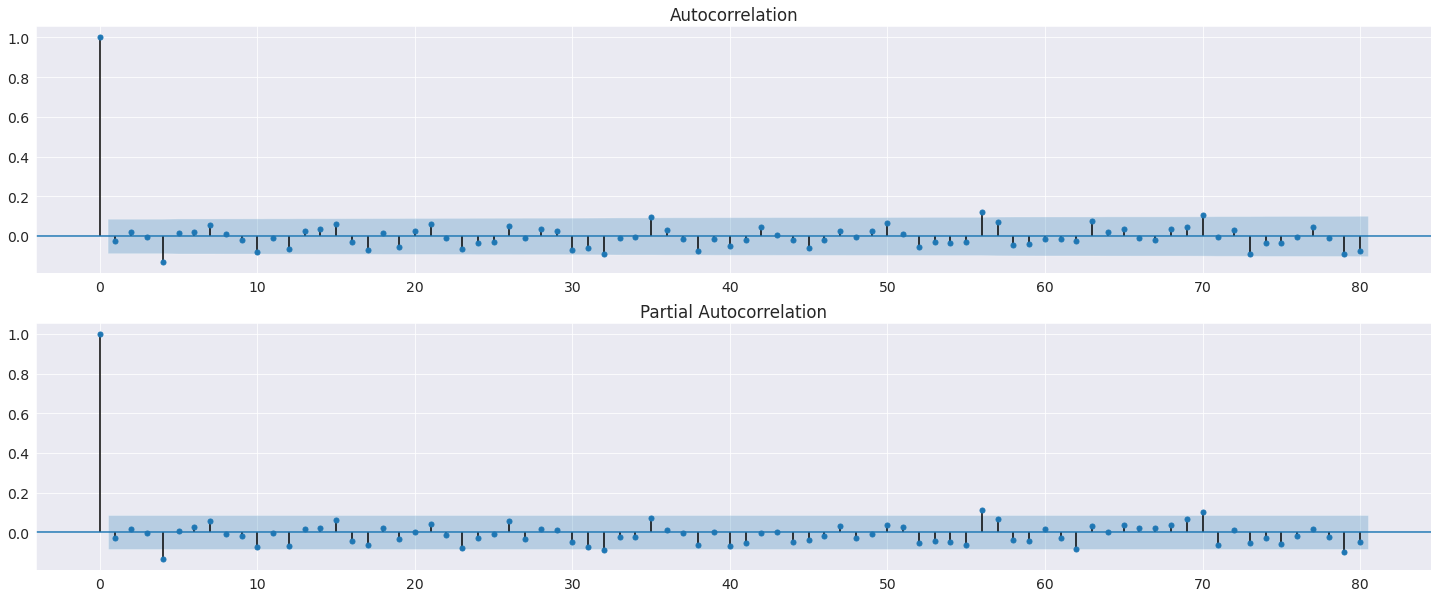

In [100]:
# Step 2: train ARIMA(0,0,[2, 3])
arima_order_0_0_23 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(2,3)], exog=exogs).fit()
print(arima_order_0_0_23.summary())
plot_acf_pacf(arima_order_0_0_23, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [2, 4])   Log Likelihood               -4613.222
Date:                   Thu, 12 Jan 2023   AIC                           9238.443
Time:                           21:47:49   BIC                           9263.861
Sample:                       01-01-2013   HQIC                          9248.408
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.206     -2.680      0.007     -61.274      -9.509
Saturday   -1349.8797    125.307    -10.773      0.000   -1595.478   -1104.282
Sunday     -1694.3001    131

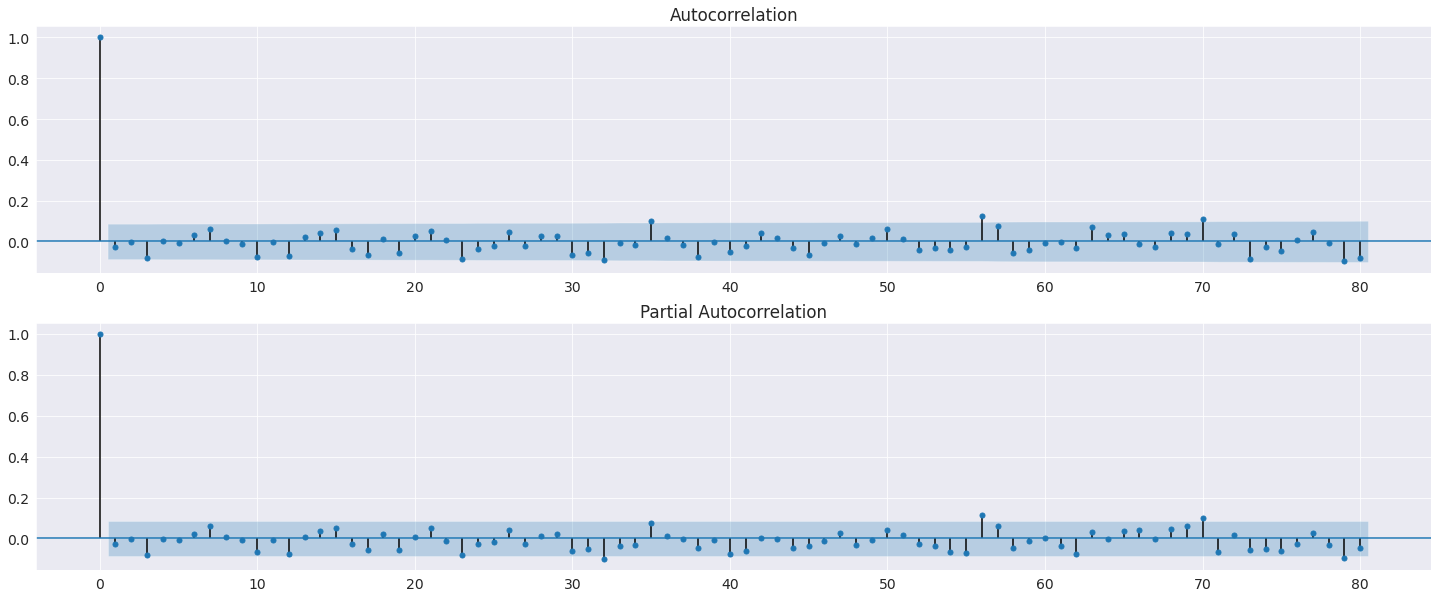

In [101]:
# Step 2: train ARIMA(0,0,[2, 4])
arima_order_0_0_24 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(2,4)], exog=exogs).fit()
print(arima_order_0_0_24.summary())
plot_acf_pacf(arima_order_0_0_24, lags=80)

                                 SARIMAX Results                                 
Dep. Variable:         EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [3, 4])   Log Likelihood               -4615.931
Date:                   Thu, 12 Jan 2023   AIC                           9243.861
Time:                           21:47:57   BIC                           9269.280
Sample:                       01-01-2013   HQIC                          9253.826
                            - 05-26-2014                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3916     12.998     -2.723      0.006     -60.868      -9.916
Saturday   -1349.8797    119.340    -11.311      0.000   -1583.781   -1115.979
Sunday     -1694.3001    125

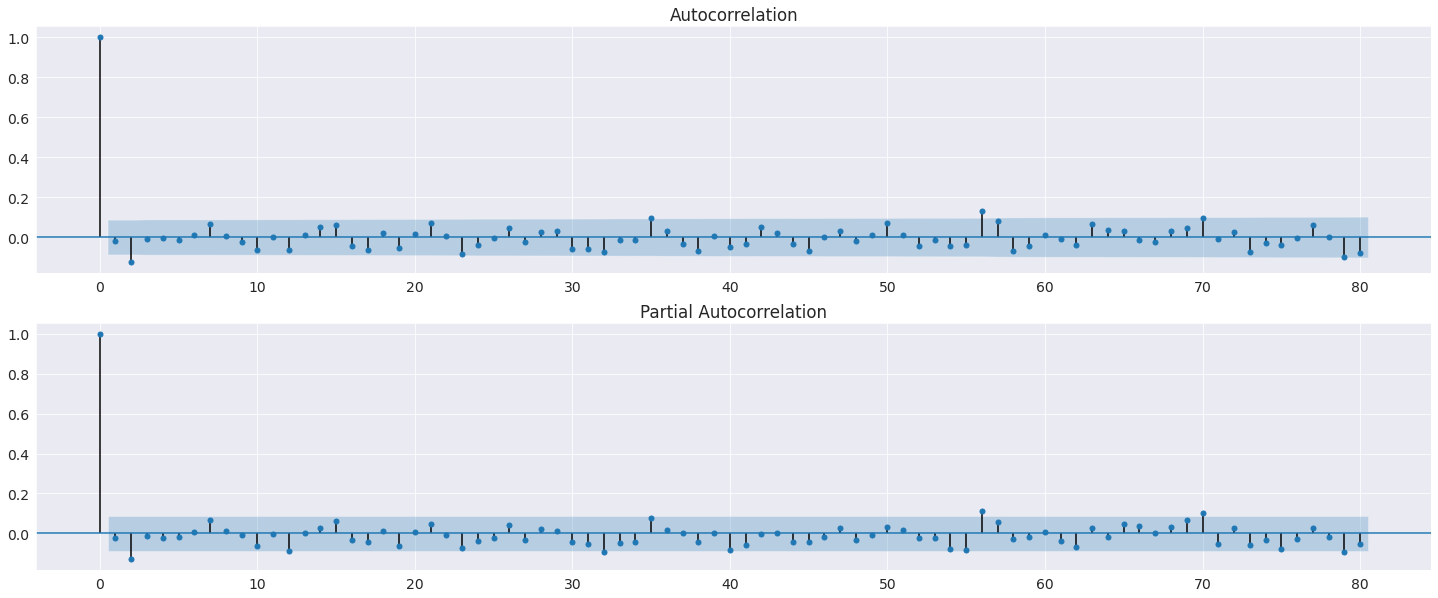

In [102]:
# Step 2: train ARIMA(0,0,[3, 4])
arima_order_0_0_34 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(3,4)], exog=exogs).fit()
print(arima_order_0_0_34.summary())
plot_acf_pacf(arima_order_0_0_34, lags=80)

                                  SARIMAX Results                                   
Dep. Variable:            EnergyConsumption   No. Observations:                  511
Model:             SARIMAX(0, 0, [2, 3, 4])   Log Likelihood               -4611.844
Date:                      Thu, 12 Jan 2023   AIC                           9237.687
Time:                              21:48:02   BIC                           9267.342
Sample:                          01-01-2013   HQIC                          9249.313
                               - 05-26-2014                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.3915     13.197     -2.682      0.007     -61.257      -9.526
Saturday   -1349.8797    124.565    -10.837      0.000   -1594.022   -1105.737
Sund

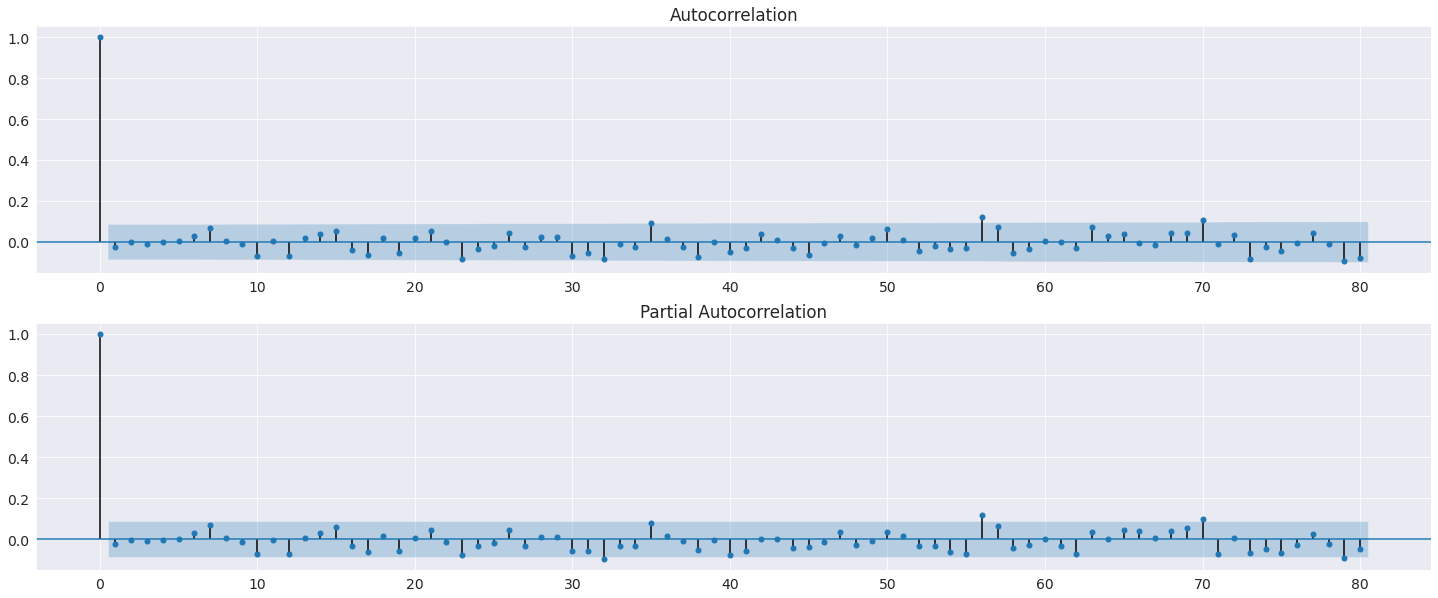

In [103]:
# Step 2: train ARIMA(0,0,[2,3,4])
arima_order_0_0_234 = sm.tsa.SARIMAX(endog=endog, order=[0,0,(2,3,4)], exog=exogs).fit()
print(arima_order_0_0_234.summary())
plot_acf_pacf(arima_order_0_0_234, lags=80)

                                  SARIMAX Results                                  
Dep. Variable:           EnergyConsumption   No. Observations:                  511
Model:             SARIMAX([3, 4], 0, [4])   Log Likelihood                   0.000
Date:                     Thu, 12 Jan 2023   AIC                             14.000
Time:                             22:02:02   BIC                             43.655
Sample:                         01-01-2013   HQIC                            25.626
                              - 05-26-2014                                         
Covariance Type:                       opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Temp1        -35.4457         -0        inf      0.000     -35.446     -35.446
Saturday   -1349.8887         -0        inf      0.000   -1349.889   -1349.889
Sunday     -

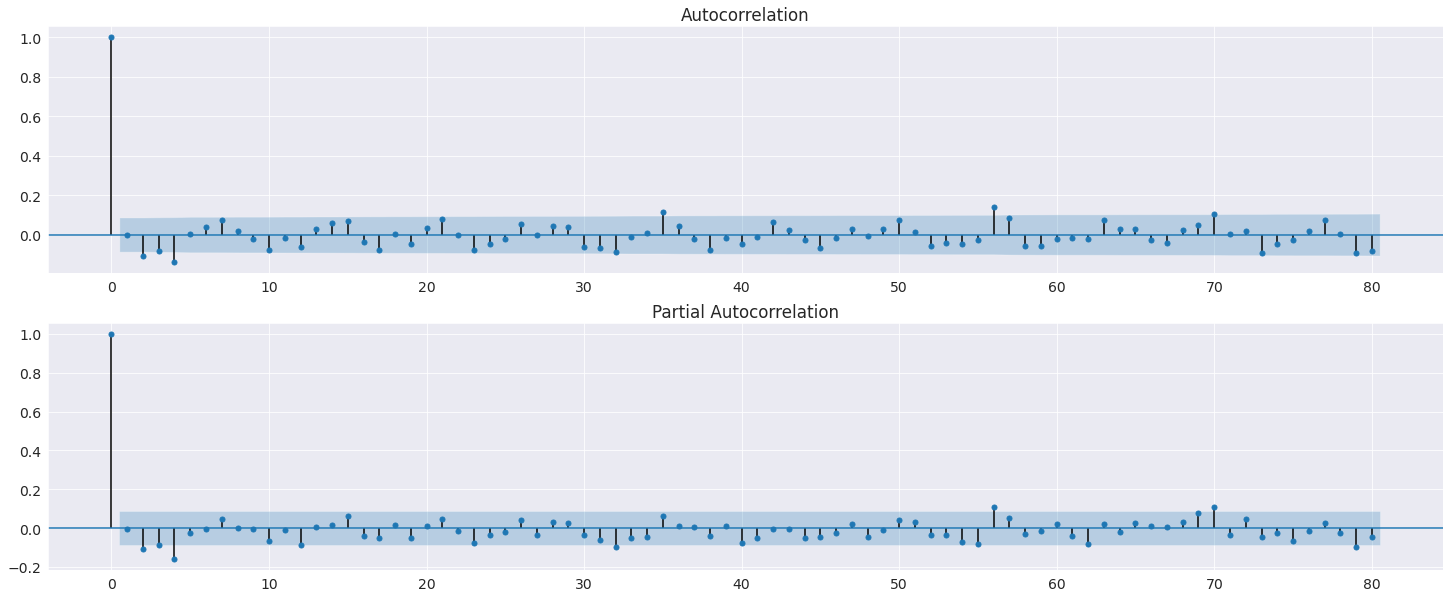

In [125]:
# Step 3: train ARIMA([2,3,4],0,[2,3,4])
arima_order_234_0_234 = sm.tsa.SARIMAX(endog=endog, order=[(3, 4),0,(4,)], exog=exogs).fit()
print(arima_order_234_0_234.summary())
plot_acf_pacf(arima_order_234_0_234, lags=80)

<h2 align="center">2. Find the best ARIMA Model automatically (30%) </h2>

* 0) define candidates for $p, d, q, P, D, Q$ values  
* 1) Run grid search for ARIMA parameters (use ts1 from the previous section) according to AIC|BIC|HQIC, feel free to use your own approach how to define the best model based on AIC|BIC|HQIC. How many time does it take to fit all ARIMA?
* 2) Run Residuals and Coefficint analysis for the best model
  - If all tests fail you need to rebuild automatically selected model (you can do it manually).
  - if there are some insignificant regressors that can be eliminated, please exclude them from the model.
* 3) build forecast for the ts2 (you need to transform exogenous variables if you applied Box-Cox tranformations in step 1); plot this forecast on the same plot with original ts2 data
* 4) Calculate loss MAPE of your forecast. Which model manually generated or automatically generated is better?

In [ ]:
# Let's train our first ARIMA (p, d, q)x(P, D, Q, s) model
arima_010_010 = sm.tsa.SARIMAX(endog = ts_wage_boxcox['wage_boxcox'], order=(0, 1, 0), seasonal_order = (0,1,0,12)).fit()
print(arima_010_010.summary())


predict = arima_010_010.get_prediction()
predict_ci = predict.conf_int() # confidence interval


start_dt = '2000-01-01'

#  Dynamic predictions
# predict_dy = arima_010_010.get_prediction(dynamic=start_dt)
# predict_dy_ci = predict_dy.conf_int() # confidence interval

# Graph
fig, ax = plt.subplots()
npre = 4
ax.set(title='Wage', xlabel='Date')

# Plot data points
ts_wage_boxcox.loc[start_dt:, 'wage_boxcox'].plot(ax=ax, style='o', label='Observed')

# Plot predictions
predict.predicted_mean[start_dt:].plot(ax=ax, style='r--', label='One-step-ahead forecast')
ci = predict_ci.loc[start_dt:]
ax.fill_between(ci.index, ci.loc[:,ci.columns[0]], ci.loc[:,ci.columns[1]], color='r', alpha=0.1)
# predict_dy.predicted_mean.loc[start_dt:].plot(ax=ax, style='g', label='Dynamic forecast 2014-01')
# ci = predict_dy_ci.loc[start_dt:]
# ax.fill_between(ci.index, ci.loc[:,ci.columns[0]], ci.loc[:,ci.columns[1]], color='g', alpha=0.1)
legend = ax.legend(loc='lower right')

In [ ]:
# Put your code here

<h1 align="center"> Theoretical Bonus Part (Extra 50%)</h1>

<br></br>





**1. Let's consider simple AR model:** 
$$AR(p)\colon \;\;\; y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t,$$  

where 
  - $y_t$ is a stationary time series with zero average,
  - $\phi_1,\dots,\phi_p$ are constants ($\phi_q \neq 0$), $~~$
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$
<br></br>
Proof that partial autocorrelation coefficients depend on $p$ and $\tau$ only:
   $$rr_{\tau} = {\bf{E}}[y_t-\hat y_t, y_{t+\tau} - \hat y_{t+\tau}]= \begin{cases}0 &, \tau>p; \\ f(\tau, p)>0 &, 1\leq\tau\leq p. \end{cases}$$
	
  where $\hat y_t$ - forecast of $y_t$ with following regression model $$y_t = \sum_{j=1}^{\tau-1}\beta_j y_{t+j}$$
  $\hat y_{t+\tau}$ - forecast of $y_{t+\tau}$ with following regression model $$y_{t+\tau} = \sum_{j=1}^{\tau-1}\gamma_j y_{t+j}.$$

<br></br>
<Answer>



**2. Let's consider simple MA model:**
  $$MA(q)\colon \;\;\; y_t = \varepsilon_t + \theta_1\varepsilon_{t-1} + \theta_2\varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q},$$
  where 
  - $y_t$ is a stationary time series with zero average,$~~$
  - $\theta_1,\dots,\theta_q$ are constants ($\theta_q \neq 0$),$~~$ 
  - $\varepsilon_t$ is gaussian white noise with zero average and constant dispersion $\sigma_\varepsilon^2.$


Proof that the correlation coefficients depend on $\tau$ and $q$
$$r_\tau=\begin{cases}0 &, \tau>q; \\ f(\tau,q)>0 &, \tau\leq q. \end{cases}$$

<br></br>
<Answer>

**3. How to select candiates for $p$ and $q$ parameters for simple ARMA model based on ACF and PACF.**

<h1 align="center"> Practical Bonus Part (Extra 50%)</h1>

Realize method for searching optimal $\lambda$ for boxcox transformation.
Approach for finding the optimal $\lambda$ is descibed <a href="https://www.academia.edu/23049010/Time_series_analysis_supported_by_power_transformations">here</a>.  

You need to replace all 'TODO' below by some code:

In [ ]:
import numpy as np
class boxcox():
    def __init__(self, lmbda=None, shift=0):
        '''
    Box Cox Transforms
    Transforms data are to be normal. Also known as power transform.
    
    Parameters
        ----------
    lmbda: float or None
        lmbda the power parameter. The None input automatically calculates
        lmbda based on method guerrero
    shift: float
        Use to normalize data by shifting data to all positive values
        
        '''
        self.lmbda = lmbda
        self.shift = shift
        self.y = []
        self.method = 'guerrero'
        
    def transform(self, x, n=2):
        '''
            x: time series
            n: number of subseries with constant dispersion
        '''
        x = 1.0*np.asarray(x)
        
        if self.shift>0:
            x=  'TODO: shift time series up'
            
        if self.lmbda is None:
            self.lmbda = 'TODO: shift time series up'
            
        
            
        if self.lmbda == 0:
            self.y = 'TODO: '
        else:
            self.y = 'TODO: '
        return self.y, self.lmbda
        
    def optimal_lambda(self,x, n=2):
        """
        Parameters
        ----------
        x - time series with different variance through the time
        n - number of subseries in x, each subseries x_i has constant variance sigma_i and constant mean m_i
        The method states, that optimal lambda should be chosen in such a way that
         
         sigma_i/(m_i)**(1-lambda) = constant, for all i=1,...,n
        
        you need to find solution for the follow Regression problem:
        
        log(sigma_i) = w_1 + w_2*log(m_i), where
        w_2 = 1-lambda
        
        """
        x = 1.0*np.asarray(x)
               
        sigma = 'TODO: initialize array for log(sigma_i)'
        m = 'TODO: initialize array for matrix of regression [1, log(m_i)]'

        r = len(x)/n  # the length of each subseries

        for i in range(n):
            m[1][i] = 'TODO: fill matrix of regression'
            sigma[i] = 'TODO: fill array of sigma'

        # find the solution for regression Xw=y, where X = m, w[1] = 1-lambda, 
        w = np.dot(np.linalg.inv(np.dot(X,X.T)),np.dot(X,y))[1]
        
        self.lmbda = 'TODO: set value of lambda'
        
        print self.lmbda
        
        return self.lmbda

    def inverse(self, y=None):
        """
        Parameters
        ----------
        y: time series

        Returns
        -------
        x: inverse transformed ts
    
        """
        if y is None:
            y = self.y
        
        if self.lmbda == 0:
            x = 'TODO' 
        else:
            x = 'TODO'
        return x

In [ ]:
# Check on Wage data
# boxcox transformation for wage dataset 
ts_wage = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/33b78c9be63831567f8036ad40c5859e824d30f7/data/monthly-wage.csv', sep=';', decimal='.', parse_dates=True, index_col='Month')

In [ ]:
# cut first steps
ts_wage = ts_wage.ix['01.01.1999':'01.01.2017']
ts_wage.plot(figsize=(25,5))

In [ ]:
bc = boxcox()
ts_wage['wage_boxcox'], lmbda = bc.transform(ts_wage['Real wage'],n=18)
print ('lambda=', lmbda)
ts_wage['wage_boxcox'].plot(figsize=(15,5))